**# KELOMPOK L**

Anggota kelompok :

Dwight J.O.Hutagalung / 2006571160

Felicia / 2006463976

Laily Nur Azizah / 2006464234

Muhammad Rayhan Nuansa Adha / 2006571053

Olivia Felica Utomo / 2006464114


In [32]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

# **TUGAS 1**

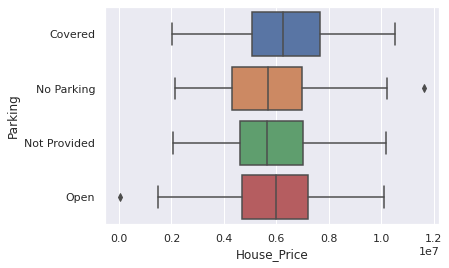

In [35]:
p = sns.boxplot(x='House_Price',y='Parking',data=price2)

In [36]:
#Cara mendapatkan outlier atas

q1 = price2['House_Price'].quantile(0.25)               #mendapatkan kuartil bawah dari data
q3 = price2['House_Price'].quantile(0.75)               #mendapatkan kuartil atas dari data
i_range= q3-q1                                          #mendapatkan interquartile range (IQR)

outlier_atas = price2['House_Price']>q3+(1.5)*i_range   #mendapatkan kuartil atas, berdasarkan interquartile rule, angka yang lebih besar dari (1.5*IQR+ kuartil ketiga) adalah sebuah outlier
data_outlier = price2.loc[outlier_atas]                 #mengambil outlier yang didapatkan dari data secara keseluruhan dan data outlier ini dimasukkan ke dalam suatu variabel
data_outlier                                            #menampilkan data outlier yang dikeluarkan

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


# **TUGAS 2**

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

--2021-04-13 11:44:32--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.007s  

2021-04-13 11:44:32 (7.63 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [34]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


In [37]:
min(price2['House_Price'])

30000

In [38]:
b=price2['House_Price'].values
for i in range(len(price2['House_Price'])):
  if b[i]==30000:
    print(i)

810


In [39]:
price2['House_Price'][811]

30000

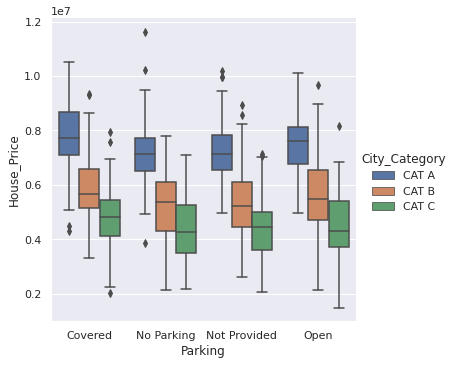

In [40]:
c=0
b=price2['House_Price'].values
for i in range(len(b)):
  if i!=810:
    c=c+b[i]
c=c/930
c

price2['House_Price'][811]=c
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

* Ada dugaan/interpretasi (baru) apakah dari boxPlot diatas?
* Sebutkan beberapa kelemahan (PitFalls) Box Plot? \\

**Dugaan/interpretasi dari boxplot diatas:**
- Tingkat kesimetrisan untuk harga rumah dengan parking terbuka cenderung simetris ke bawah. Dengan kata lain, harganya sangat murah
- Terdapat noise pada harga rumah dengan parking terbuka kategori kota A
- Harga rumah kategori kota A cenderung lebih mahal dibandingkan 2 kota lainnya
- Harga rumah tanpa parking pada kategori kota A dan rumah dengan parking terbuka kategori kota C memiliki harga yang jauh lebih tinggi pada outliers nya. 

**Kelemahan Box Plot:** 
- tidak menunjukkan kepadatan datanya dan sulit untuk menentukan data lebih condong ke Q1 atau Q2. Sehingga harus digunakan swarn plot atau violin plot jika ingin melihat kepadatan datanya.
- Box plot hanya menampilkan visualisasi data yang sederhana, sehingga bisa saja penyebaran data yang dihasilkan kurang akurat jika data yang digunakan sangat besar.
- Box plot hanya memberikan informasi yang "setengah-setengah" karena hanya memiliki 2 variabel.

# **TUGAS 3**

# Data studi kasus

In [13]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1. Adakah tipe variabel yang kurang tepat di data tersebut?

Berdasarkan perintah tips.info(), kita bisa melihat tipe-tipe variabel apa saja pada kolom-kolom yang tersedia. Pada soal ini, kolom ‘total_bill’, ‘tip’, ‘sex’, ‘day’, ‘time’, dan ‘size’ sudah memiliki variabel yang sesuai, kecuali kolom ‘smoker’ yang dimana seharusnya tipe variabelnya adalah boolean karena berbentuk True/False sehingga harus kita ubah menggunakan perintah Custom Conversion yaitu np.where().

In [14]:
tips["smoker"] = np.where(tips["smoker"]=="Y", True, False)
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker            bool
day           category
time          category
size             int64
dtype: object

# 2. Apakah data numeriknya cenderung berdistribusi normal?

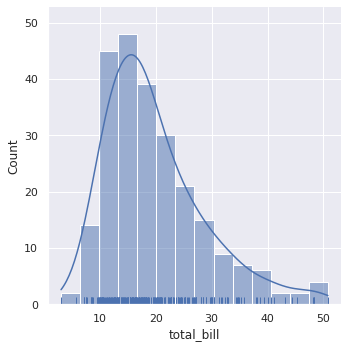

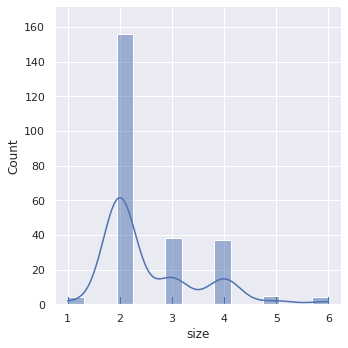

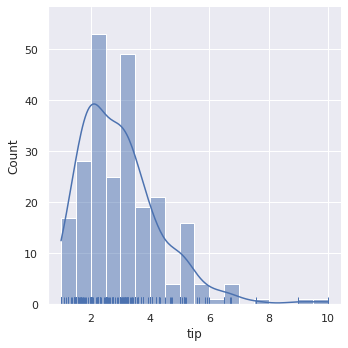

In [47]:
p = sns.displot(tips['total_bill'], kde=True, rug=True)
p = sns.displot(tips['size'],kde=True, rug=True)
p = sns.displot(tips['tip'],kde=True, rug=True)

Jika kita lihat pada grafik distribusi data numeriknya kita dapat menyimpulkan bahwa grafik tersebut bukanlah berdistribusi normal melainkan skewness (kemiringan) positif yaitu kemiringan distribusi datanya condong ke kiri.

# 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

*   Duplikasi data, terdapat 1 duplikasi data

In [17]:
print(tips.shape)
tips.duplicated().sum()

tips[tips[['total_bill', 'tip', 'smoker', 'day', 'time', 'size']].duplicated() == True]

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,False,Thur,Lunch,2


*  Missing values, tidak ada missing values

In [19]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

*  Outlier

Data-data Outlier-nya:

In [22]:
%%html
<iframe src="https://drive.google.com/file/d/1hm1j3j83DPlKTZjVJdftqRVbHEfysdiH/preview" width="640" height="480"></iframe>

In [27]:
%%html
<iframe src="https://drive.google.com/file/d/1Ay-reJuUioNMhCFHcPiC987mFwsH7TJ7/preview" width="640" height="480"></iframe>

*   Noise

# 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

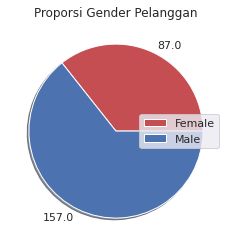

In [24]:
data = tips['sex']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'b']
labels = proporsion.keys()
plt.pie(values, colors=colors, labels= values, shadow=True)
plt.title('Proporsi Gender Pelanggan')
plt.legend(labels,loc='right')
plt.show()

Berdasarkan visualisasi yang digunakan dengan pie chart, diperoleh data jumlah pelanggan yang datang berdasarkan gender adalah 157 pria dan 87 wanita. Dapat disimpulkan bahwa hampir ⅔ pelanggan restoran yang datang adalah pria, sehingga proporsi pelanggan pria dan wanita yang datang ke restaurant tidak seimbang.

#5. Dari data yang ada apakah pria atau wanita ada kecenderungan memberi tips lebih besar?

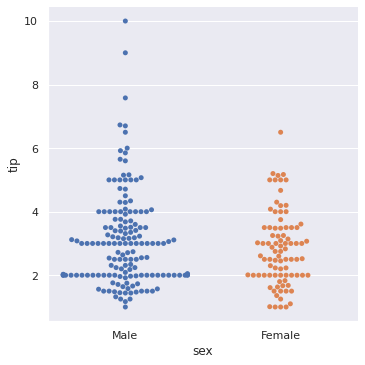

In [50]:
#visualisasi untuk melihat proporsi tips yang diberikan pelanggan berdasarkan gender
p= sns.catplot(x="sex", y="tip", kind="swarm", data=tips)

Berdasarkan visualisasi yang digunakan dengan swarn plot, diperoleh hasil tips yang diberikan oleh pelanggan berdasarkan gendernya. Swarn plot menunjukkan terdapat beberapa pelanggan pria yang memberikan tips lebih banyak dibandingkan pelanggan wanita. Dari hasil plot, dapat dilihat juga bahwa tips maksimal yang diberikan oleh pelanggan pria adalah ±$10.00 dan pelanggan wanita ±$6.50. Hal ini dapat memberikan kesimpulan bahwa pelanggan pria cenderung memberikan tips yang lebih besar. 

# 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

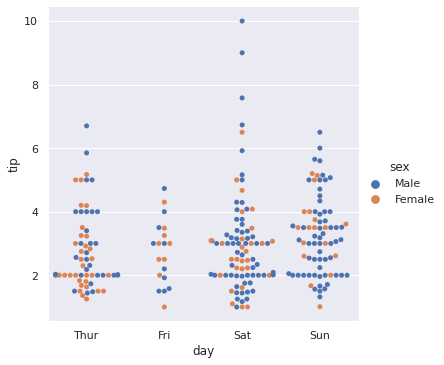

In [51]:
#visualisasi untuk melihat kecenderungan tips yang diberikan berdasarkan hari-hari tertentu
q= sns.catplot(x="day", y="tip", hue="sex", kind="swarm", data=tips)

Berdasarkan visualisasi yang digunakan dengan swarn plot, diperoleh hasil tips yang diberikan oleh pelanggan pada hari-hari tertentu. Secara rata-rata dapat dilihat bahwa tips di hari-hari lain hampir memiliki rentangan yang sama, namun hal ini juga bergantung kepada faktor lainnya. Hasil plot ini menunjukkan bahwa terdapat pelanggan yang memberikan tips lebih banyak di hari Sabtu. Sehingga, dapat disimpulkan bahwa terdapat kecenderungan pelanggan memberi tips lebih besar di hari Sabtu.

#7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

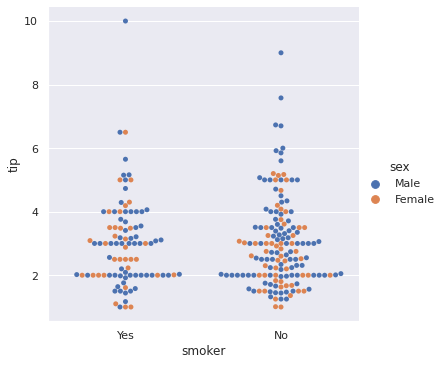

In [ ]:
#visualisasi untuk melihat kecenderungan besar tips customer perokok 
#Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

p = sns.catplot(x="smoker", y="tip", hue="sex", kind="swarm", data=tips)

#Customer perokok memberikan lebih sedikit tips daripada non-perokok, yang mana sebagian besar customer non-perokok yang memberikan tips adalah laki-laki.

Berdasarkan visualisasi ini, diperoleh hasil tips yang diberikan oleh customer perokok. Secara rata-rata dapat dilihat bahwa tips di hari-hari lain hampir memiliki rentangan yang sama, namun hal ini juga bergantung kepada faktor lainnya. Hasil plot ini menunjukkan bahwa terdapat pelanggan yang memberikan tips lebih banyak di hari Sabtu. Sehingga, dapat disimpulkan bahwa terdapat kecenderungan pelanggan memberi tips lebih besar di hari Sabtu.

# 8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

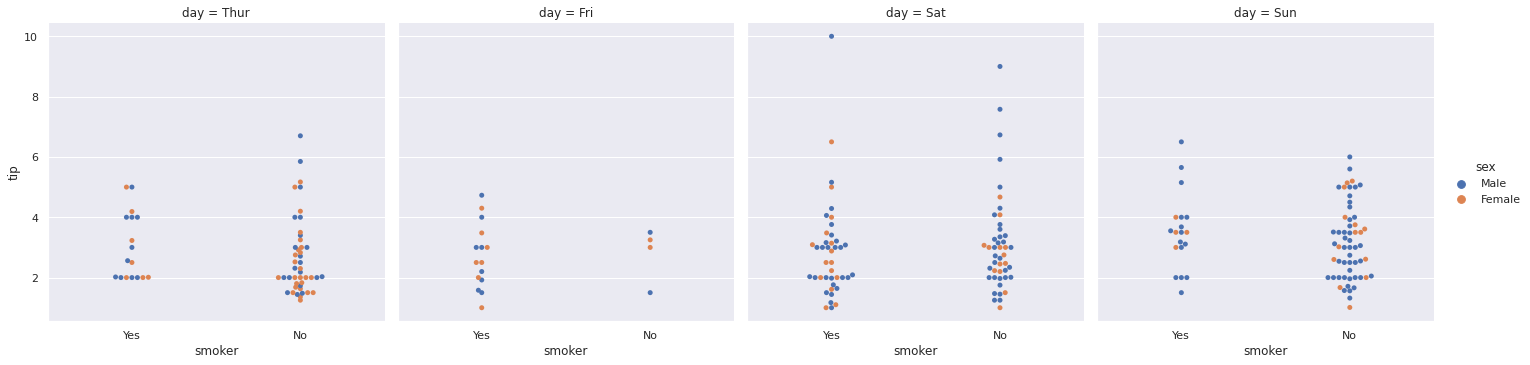

In [ ]:
#visualisasi kecenderungan tips yang diterima berdasarkan pola hari
#Apakah pola di nomer 5 dan 7 dipengaruhi hari?

g = sns.catplot(x="smoker", y="tip", hue="sex", col="day", data=tips, kind="swarm");

#pelnggan yg ngasi tips datang pas weeknd lebih banyak
#Di restoran tsb, sebagian besar konsumen pemberi tips adalah non perokok, kecuali hari jumat
#Dari sisi sex, Konsumen pemberi tips dominan laki-laki dan non perokok, kecuali hari kamis

#9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

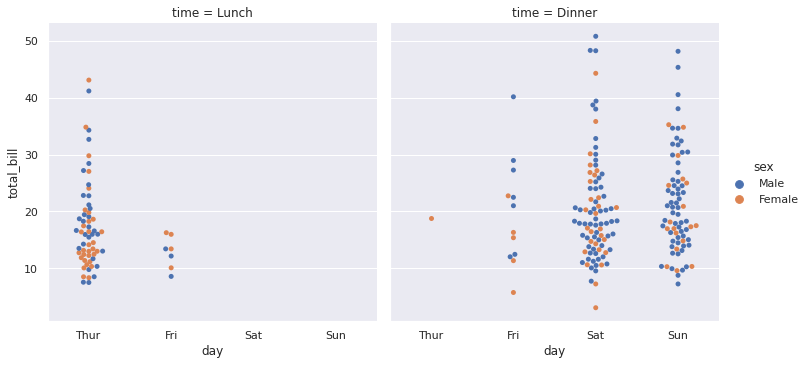

In [ ]:
#Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

#a. Visualisasi total_bill dan sex
p = sns.catplot(x="day", y="total_bill", hue="sex", col="time", kind="swarm", data=tips)
#Sebagian customer restoran tersebut merupakan customer laki-laki"
#Restoran ramai dan mendapatkan banyak pemasukan saat jam makan malam. Maka untuk meramaikan restoran pada jam makan siang, restoran dapat melakukan promosi yang berlaku saat jam makan siang

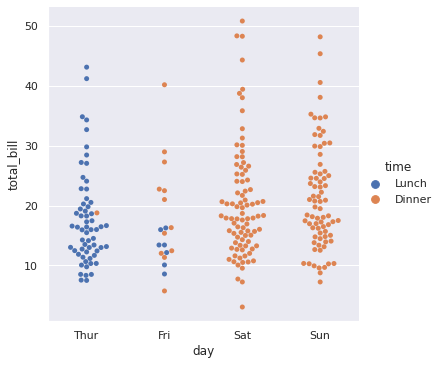

In [ ]:
#b 
p = sns.catplot(x="day", y="total_bill", hue="time", kind="swarm", data=tips)


#10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

*   Pemilik restoran dapat membuat nuansa restaurant menjadi lebih dominan ke selera pria untuk menarik lebih banyak pelanggan pria karena berdasarkan data yang ada, hampir ⅔ pelanggan yang datang adalah pria. 
*   Pemilik restoran dapat mengadakan promosi yang berlaku saat jam makan siang untuk menarik pelanggan terutama saat *weekday*.



# 11.Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?



*   Critical thinking
*   Problem solving
*   Pengetahuan mengenai *seaborn*

